In [1]:
!python -V

Python 3.9.12


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [3]:
pdf_ytd2023_01 = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')


# Q1. Downloading the data

In [4]:
pdf_ytd2023_01.shape[1]

19

In [5]:
pdf_ytd2023_01.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

# Q2. Computing duration

In [ ]:
pdf_ytd2023_01.tpep_dropoff_datetime = pd.to_datetime(pdf_ytd2023_01.tpep_dropoff_datetime    )
pdf_ytd2023_01.tpep_pickup_datetime  = pd.to_datetime(pdf_ytd2023_01.tpep_pickup_datetime     )

pdf_ytd2023_01['duration'] = pdf_ytd2023_01['tpep_dropoff_datetime'] - pdf_ytd2023_01['tpep_pickup_datetime']
pdf_ytd2023_01['duration'] = pdf_ytd2023_01['duration'].apply(lambda td: td.total_seconds() / 60)


In [ ]:
pdf_ytd2023_01.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [ ]:
pdf_ytd2023_01.duration.std()

42.594351241920904

# Q3. Dropping outliers

<AxesSubplot:xlabel='duration', ylabel='Density'>

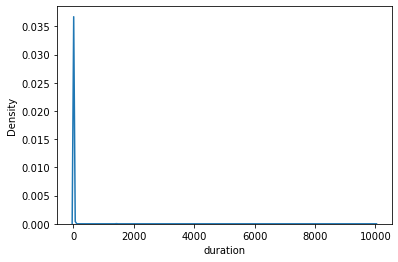

In [ ]:
sns.kdeplot(pdf_ytd2023_01.duration, label='Duration')

In [ ]:
((pdf_ytd2023_01.duration >=1) & (pdf_ytd2023_01.duration <= 60)).mean()

0.9812202822125979

In [ ]:
pdf_ytd2023_01 = pdf_ytd2023_01[((pdf_ytd2023_01.duration >=1) & (pdf_ytd2023_01.duration <= 60))]

# Q4. One-hot encoding


In [ ]:

categorical = ['PULocationID', 'DOLocationID']

pdf_ytd2023_01_features = pdf_ytd2023_01[categorical].astype(str)

dv = DictVectorizer()
x_train = dv.fit_transform(pdf_ytd2023_01_features.to_dict(orient='records'))
x_train.shape[1]

515

# Q5. Training a model


In [ ]:
target_field = 'duration'
y_train = pdf_ytd2023_01[target_field]

lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_train)

In [ ]:
mean_squared_error(y_train, y_predict, squared=False)

7.649261027792376

# Q6. Evaluating the model

In [ ]:
pdf_ytd2023_02 = pd.read_parquet('./data/yellow_tripdata_2023-02.parquet')


In [ ]:
pdf_ytd2023_02.tpep_dropoff_datetime = pd.to_datetime(pdf_ytd2023_02.tpep_dropoff_datetime    )
pdf_ytd2023_02.tpep_pickup_datetime  = pd.to_datetime(pdf_ytd2023_02.tpep_pickup_datetime)

pdf_ytd2023_02['duration'] = pdf_ytd2023_02['tpep_dropoff_datetime'] - pdf_ytd2023_02['tpep_pickup_datetime']
pdf_ytd2023_02['duration'] = pdf_ytd2023_02['duration'].apply(lambda td: td.total_seconds() / 60)

pdf_ytd2023_02 = pdf_ytd2023_02[((pdf_ytd2023_02.duration >=1) & (pdf_ytd2023_02.duration <= 60))]

pdf_ytd2023_02_features = pdf_ytd2023_02[categorical].astype(str)





: 

In [ ]:
dv = DictVectorizer()
x_train = dv.fit_transform(pdf_ytd2023_02_features.to_dict(orient='records'))


In [ ]:
y_predict = lr.predict(x_train)

In [ ]:
y_train = pdf_ytd2023_02['duration']
mean_squared_error(y_train, y_predict, squared=False)

In [ ]:
pdf_ytd2023_01.duration.describe(percentiles=[0.50, 0.97, 0.9812, 0.99])

In [ ]:
# pdf = pdf[pdf.trip_type == 2.0]

In [ ]:
pdf.head()

In [ ]:
sns.displot(pdf.duration, label='duration', )

In [ ]:
pdf.duration.describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.98, 0.99])

In [ ]:
((pdf.duration >=0) & (pdf.duration <=75.3)).mean()

In [ ]:
pdf = pdf[((pdf.duration >=0) & (pdf.duration <=75.3))]

In [ ]:
sns.displot(pdf.duration, height=10, aspect=20/10)

In [ ]:
categorical = ['PULocationID', 'DOLocationID']
pdf[categorical] = pdf[categorical].astype(str)
numerical = ['trip_distance']


In [ ]:
pdf

In [ ]:
pdf_ds = pdf[categorical + numerical]
pdf_ds.head()
pdf_ds.dtypes

In [ ]:
pdf_ds

In [ ]:
train_dict = pdf_ds.to_dict(orient='records')

In [ ]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [ ]:
target = 'duration'
Y_train = pdf[target].values

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
sns.kdeplot(Y_train, label="Train", fill=True)
sns.kdeplot(y_pred, label='Prediction', fill=True)
plt.legend()
plt.title("Train vs Predict")
plt.xlabel("Duration")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()

In [ ]:
mean_squared_error(Y_train, y_pred, squared=False)

In [ ]:
ls = Lasso(alpha=0.01)
ls.fit(X_train, Y_train)
y_pred = ls.predict(X_train)


In [ ]:
sns.kdeplot(Y_train, label="Train", fill=True)
sns.kdeplot(y_pred, label='Prediction', fill=True)
plt.legend()
plt.title("Train vs Predict")
plt.xlabel("Duration")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()

mean_squared_error(Y_train, y_pred, squared=False)

In [ ]:
ls = Ridge()
ls.fit(X_train, Y_train)
y_pred = ls.predict(X_train)

In [ ]:
sns.kdeplot(Y_train, label="Train", fill=True)
sns.kdeplot(y_pred, label='Prediction', fill=True)
plt.legend()
plt.title("Train vs Predict")
plt.xlabel("Duration")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()

mean_squared_error(Y_train, y_pred, squared=False)